Last week, Sat 25/05/2019 in Ivrea (TO) Italy, my best friends Federico and Alexander opened a new shop for $cool clothes$. 
Wishing to contribute to his luck, I am gonna try to use this tool, IBM Watson Studio, and my knowledge, a master degree in Math at the university of Turin, to code (python), discuss (probability and statistics) my 3rd project in the analysis of real data (that I will try to collect by myself, with autorization for sure).

You shall come personally to the shop, and $contribute$ to the sample size 

and/or you could comment here and $contribute$ to my training.

From analyzing a toy SIMULATED data set of costumer entrance in a shop we will see:
- 1 an unsupervised learning technique for clustering costumer behavior
- 2 a supervised learning technique for predict costumer expense
- 3 a reinforcement learning network for deciding how long assistant should attend costumer

In [2]:
# The code was removed by Watson Studio for sharing.

,costumer_id,entrance_time,entrance_date,costumer_age,costumer_sex,wearing_shoes,is_on_ista,is_on_fb,visit_number,visit_duration,expense,attended_by
0,D,16.52.22,28/05/19,17,M,UNKNOW,YES,YES,1,22,"€ 35,00",EMI
1,A,18.15.28,28/05/19,18,M,UNKOWN,NO,NO,1,36,"€ 45,00",EMI
2,A,13.22.16,28/05/19,15,M,nike,NO,NO,2,48,"€ 22,00",EMI
3,B,17.33.49,28/05/19,16,F,nike,NO,NO,1,60,"€ 25,00",EMI
4,C,16.21.55,28/05/19,16,F,adidas,YES,YES,1,55,"€ 16,00",EMI


In [3]:
arr = df.values
# extract expense from string
expFloat = df['expense'].apply(lambda x:float(x[1:].split(',')[0]))
expArr = np.array(expFloat)
ageArr = np.array(df['costumer_age'])
visitArr = np.array(df['visit_duration'])

On $\Omega$ are defined:

In [4]:
n_features = len(df.columns)
print('p=', n_features)

p= 12


 

Random Variables R.V. 

${\LARGE{THEORY}}$ What does it mean cluster the data? 

1 -  define some measure on the codomain of the R.V. selected. Here we used 3 continuous R.V. (for simplicity) i.e.

${\bf{X}}$: from $\Omega$ to $R^3$ with the Euclidian distance.

2 - Identify all $\omega \in \Omega$ whose image is 'similar' and embed them into $\Omega_{cluster}$ to each others but different from all others. We use k-means.

3 - ${\textit{Partition}}$ $\Omega$ in $\cup\Omega_{cluster}$

We made for cluster since I generated the data and knew it.

${\LARGE{HEURISTICS}}$:
What is good for?

We could divide our original sample space in smaller, disjoint set, thus definine a sub populations without asking information to the data.. And then perform for example classical statistics on those, ${\textit{or tell them whom to vote for}}$.

In [7]:
### Unsupervised leanring: kmeans
def handKmeans(x, n_clusters, n_iter, initCentroid = None): # raw
    n_samples, n_features = x.shape
    distances = np.zeros((n_samples, n_clusters)) 
    # random initialization of cluster centers
    if initCentroid is None:
        a=np.min(x.T, axis=1)
        b=np.max(x.T, axis=1)
        initCentroids = np.zeros((n_clusters, n_features))
        for c in range(n_clusters):
            initCentroids[c] = np.random.uniform(a,b)
    centroids = initCentroids
    # start learning
    for i in range(n_iter):
        # step1. compute distances form centroids
        for c in range(n_clusters):
            distances[:,c] = np.sum((x - centroids[c])**2, axis=1)
        #  step2. assign samples to clusters
        labels = np.argmin(distances,axis=1)
        #  step3. recompute centroids
        for c in range(n_clusters):
            centroids[c] = np.mean(x[labels==c],axis=0)

    return centroids, labels, initCentroids

from sklearn.cluster import KMeans # or imported

sklearn took 0:00:00.026391
cell above took -1 day, 23:59:59.921682
0 [ 44.85714286  23.57142857 310.38095238]
0 [ 43.63636364  19.68181818 507.22727273]
1 [ 45.72727273  20.27272727 543.75757576]
1 [ 44.625       22.95833333 297.79166667]
2 [19.64864865 29.43243243 59.43243243]
2 [21.03174603 24.12698413 92.85714286]
3 [ 25.06896552  16.79310345 147.5862069 ]
3 [ 49.90909091  21.45454545 616.81818182]


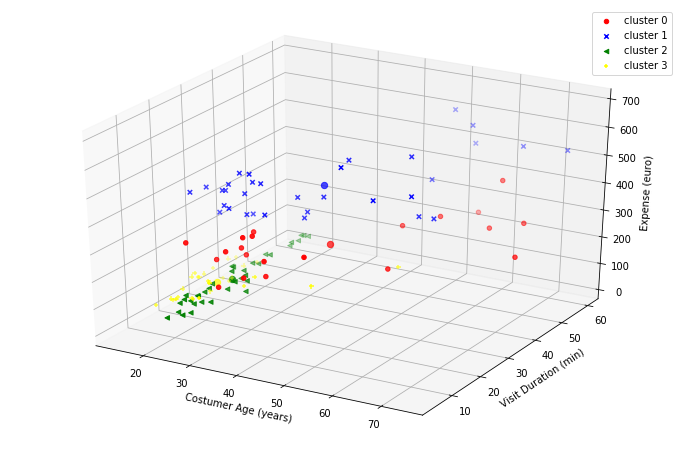

In [16]:
''' Unsupervised Learning '''
# compute kmeans with sklearn library
now = datetime.datetime.now()
n_clusters = 4 
# Def: X is a random vector on Omega, X=x a sample of n_samples observations.
x = np.vstack((ageArr, visitArr, expArr)).T
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(x)
now1 = datetime.datetime.now() 
print('sklearn took', now1-now)

now2 = datetime.datetime.now()
centroids, clusterMembership, initCentroid = handKmeans(x, n_clusters, 500, initCentroid = None)
now3 = datetime.datetime.now()
print('cell above took', now2-now3)


fig1 = plt.figure(figsize=(12,8))
colors = ['red','blue','green','yellow']
markers = ['o', 'x', '<', '+']
axk = fig1.add_subplot(111, projection='3d')#,aspect=True)
# Plot clusters
for i in range(n_clusters):
    axk.scatter(ageArr[np.where(kmeans.labels_==i)[0]], visitArr[np.where(kmeans.labels_==i)[0]], expArr[np.where(kmeans.labels_==i)[0]], marker=markers[i], color=colors[i], label = 'cluster {}'.format(i))
    print(i, kmeans.cluster_centers_[i])
    print(i, centroids[i])
    axk.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], kmeans.cluster_centers_[i][2], color=colors[i], s=40, marker='o', alpha=0.7)   
# Others
axk.set_xlabel('Costumer Age (years)')
axk.set_ylabel('Visit Duration (min)')
axk.set_zlabel('Expense (euro)')
plt.legend()

In [17]:
### Supervised Learning: pearson rho
def handPearson(x, y): # raw
    return np.sum((x-np.mean(x))*(y-np.mean(y))) /  np.sqrt(np.sum((x-np.mean(x))**2)*np.sum((y-np.mean(y))**2))

import scipy # or imported

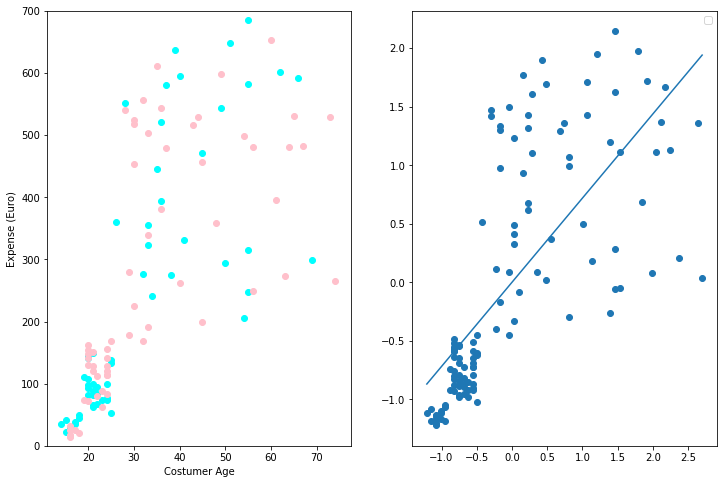

In [18]:
''' Supervised Learning '''
# compute corr
ageNorm = (ageArr - np.mean(ageArr))/np.std(ageArr)
expNorm = (expArr - np.mean(expArr))/np.std(expArr)
r, p = scipy.stats.pearsonr(ageNorm, expNorm)
x = np.linspace(min(ageNorm), max(ageNorm),100)
y =  x*r + np.mean(expNorm) - r*np.mean(ageNorm)


fig2 = plt.figure(figsize=(12,8))
ax = fig2.add_subplot(121)#, projection='3d',aspect=True)
ax.scatter(df['costumer_age'].where(df.costumer_sex=='M'), expFloat.where(df.costumer_sex=='M'), marker='o', color='cyan',label='M')    
ax.scatter(df['costumer_age'].where(df.costumer_sex=='F'), expFloat.where(df.costumer_sex=='F'), marker='o', color='pink',label='F') 
# Plot regression line
axr = fig2.add_subplot(122)#, projection='3d',aspect=True)
axr.scatter(ageNorm, expNorm)
axr.plot(x, y)
# Other  
ax.set_xlabel('Costumer Age')
ax.set_ylabel('Expense (Euro)')
ax.set_ylim([0,700])
plt.legend()

${\LARGE{𝐻𝐸𝑈𝑅𝐼𝑆𝑇𝐼𝐶𝑆}}$ Careful with the interpretation.

This does not mean they spend more because they are older, in principle it might be that ${\textit{they are older since they spend more}}$.



${\LARGE{THEORY}}$ Correlation does not tell notihng about  any relation of causality. 

It actually tell us about relation of dependency, when is different from 0.

$REMARK$: when is 0 independency follows ONLY under Gaussian assumption.